In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import stats


In [70]:
df = pd.read_csv('combined_dataset.csv')
df.head() 

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,dataset
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2.0,train
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1.0,train
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5.0,train
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5.0,train
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5.0,train


In [71]:
df.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score', 'dataset'],
      dtype='object')

In [72]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,56911.000000,56911.000000,56911.000000,56911.000000,51505.000000,36992.000000
mean,37.036355,-40.970902,243.704243,29287.618994,686.563762,3.463397
std,15.885146,226.896073,400.262304,19466.710286,193.398290,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,59.830000,14195.630000,615.970000,3.000000
50%,37.000000,12.000000,161.620000,27560.380000,697.820000,4.000000
75%,51.000000,16.000000,355.460000,40896.595000,764.280000,5.000000
max,64.000000,26.000000,3350.060000,99995.030000,2069.069761,5.000000


In [73]:
df.dtypes

customer_id                      object
Name                             object
age                               int64
gender                           object
security_no                      object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                float64


In [74]:
# Check for duplicates
duplicates = df.duplicated()

# Display the rows that are duplicates
duplicate_rows = df[duplicates]

print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")


Number of duplicate rows: 0


In [75]:
null_summary = df.isnull().sum().loc[lambda x: x > 0]
null_percentage = (null_summary / len(df)) * 100

print(pd.DataFrame({'Null Count': null_summary, 'Null Percentage': null_percentage}))

                       Null Count  Null Percentage
region_category              8376        14.717717
preferred_offer_types         447         0.785437
points_in_wallet             5406         9.499042
churn_risk_score            19919        35.000264


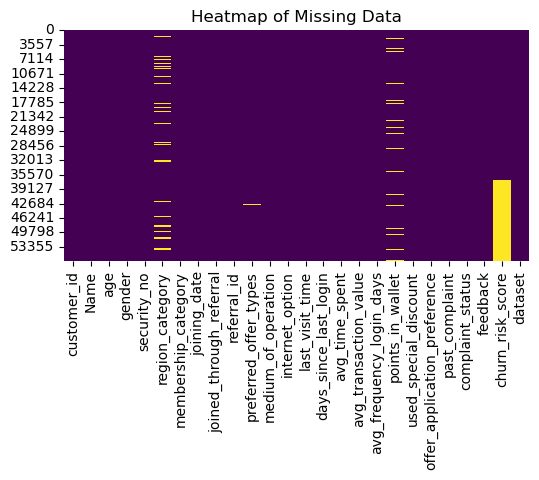

In [76]:
# Heatmap to visualize missing values
plt.figure(figsize=(6, 3))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data')
plt.show()

In [77]:
df = df.drop(columns=['Name'])
df = df.drop(columns=['security_no'])
df = df.drop(columns=['last_visit_time'])

df.columns

Index(['customer_id', 'age', 'gender', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'complaint_status', 'feedback', 'churn_risk_score',
       'dataset'],
      dtype='object')

In [78]:
# Filling null values in region_category with Unknown
df['region_category'].fillna('Unknown', inplace=True)
print(df['region_category'].isnull().sum())

0


In [79]:
# Converting joining_date to datetime format
df['joining_date'] = pd.to_datetime(df['joining_date'], errors='coerce')
print(df['joining_date'].head())

0   2017-08-17
1   2017-08-28
2   2016-11-11
3   2016-10-29
4   2017-09-12
Name: joining_date, dtype: datetime64[ns]


In [80]:
# Replace values in 'referral_id' that match the pattern 'xxxxxxxx' with 'unknown'
df['referral_id'] = df['referral_id'].replace('xxxxxxxx', 'unknown', regex=True)
print(df['referral_id'].head())

0     unknown
1    CID21329
2    CID12313
3     CID3793
4     unknown
Name: referral_id, dtype: object


In [81]:
df['joined_through_referral'] = df.apply(lambda row: 'No' if row['referral_id'] == 'xxxxxxxx' or row['referral_id'] == '' else 'Yes' if row['joined_through_referral'] == '?' else row['joined_through_referral'],
    axis=1)
print(df[['referral_id', 'joined_through_referral']].head())

  referral_id joined_through_referral
0     unknown                      No
1    CID21329                     Yes
2    CID12313                     Yes
3     CID3793                     Yes
4     unknown                      No


In [82]:
#filling null values with unknown
df['preferred_offer_type'] = df['preferred_offer_types'].fillna('Unknown')
print(df['preferred_offer_type'].isnull().sum())

0


In [83]:
#filling '?' with zero for medium_of_operation
df['medium_of_operation'] = df['medium_of_operation'].replace('?','Unknown')
print(df['medium_of_operation'].head())

0       Unknown
1       Desktop
2       Desktop
3       Desktop
4    Smartphone
Name: medium_of_operation, dtype: object


In [84]:
#replacing negative value in days_since_last_login to -1
df['days_since_last_login'] = df['days_since_last_login'].replace(-999, -1)
print(df['days_since_last_login'].head())

0    17
1    16
2    14
3    11
4    20
Name: days_since_last_login, dtype: int64


In [85]:
#converting negative values in days_since_last_login to zero or -1
df.loc[df['avg_time_spent'] <0 , 'days_since_last_login'] = 0
print(df['days_since_last_login'].min())

-1


In [86]:
#converting negative values in avg_time_spent to zero 
df.loc[df['avg_time_spent'] < 0, 'avg_time_spent'] = 0
print(df['avg_time_spent'].min())

0.0


In [87]:
# Replace error values and negative values with -1
df['avg_frequency_login_days'] = pd.to_numeric(df['avg_frequency_login_days'], errors='coerce')  # Convert to numeric and set errors to NaN
df['avg_frequency_login_days'].fillna(-1, inplace=True)  # Replace NaNs (previously errors) with -1
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].apply(lambda x: -1 if x < 0 else x)  # Replace negative values with -1

print(df['avg_frequency_login_days'].min())

-1.0


In [88]:
# Fill null values in 'points_in_wallet' with 0
df['points_in_wallet'].fillna(0, inplace=True)
print(df['points_in_wallet'].isnull().sum()) 


0


In [89]:
# Calculate counts
null_count = (df['points_in_wallet'] == 0).sum()  # Nulls (which were filled with 0)
negative_count = (df['points_in_wallet'] < 0).sum()  # Negative values
positive_count = (df['points_in_wallet'] > 0).sum()  # Positive values

# Total number of entries
total_count = len(df['points_in_wallet'])

# Calculate percentages
null_percentage = (null_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100
positive_percentage = (positive_count / total_count) * 100

# Print results
print(f"Percentage of Null values: {null_percentage:.2f}%")
print(f"Percentage of Negative values: {negative_percentage:.2f}%")
print(f"Percentage of Positive values: {positive_percentage:.2f}%")

Percentage of Null values: 9.50%
Percentage of Negative values: 0.35%
Percentage of Positive values: 90.15%


In [90]:
df_points=df[df['points_in_wallet']<0]
df_points
print(df_points['churn_risk_score'].value_counts())
 
df_points=df[df['points_in_wallet'].isnull()]
df_points
print(df_points['churn_risk_score'].value_counts())

 5.0    60
 4.0    33
 3.0    24
 2.0     9
 1.0     8
-1.0     2
Name: churn_risk_score, dtype: int64
Series([], Name: churn_risk_score, dtype: int64)


In [91]:
# Fill null values in 'preferred_offer_types' with unknown
df['preferred_offer_types'] = df['preferred_offer_types'].fillna('Unknown')
print(df['preferred_offer_types'].isnull().sum()) 


0


In [92]:
#dropping referral id column
df = df.drop(columns=['referral_id'])
df.columns

Index(['customer_id', 'age', 'gender', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'preferred_offer_types', 'medium_of_operation', 'internet_option',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score', 'dataset', 'preferred_offer_type'],
      dtype='object')

In [93]:
#clean dataset without null values
null_summary = df.isnull().sum().loc[lambda x: x > 0]
null_percentage = (null_summary / len(df)) * 100

print(pd.DataFrame({'Null Count': null_summary, 'Null Percentage': null_percentage}))

                  Null Count  Null Percentage
churn_risk_score       19919        35.000264


In [94]:
df_encoded = pd.get_dummies(df, columns=['gender'])
print(df['gender'].head())

0    F
1    F
2    F
3    M
4    F
Name: gender, dtype: object


In [95]:
# Display the unique categories
unique_categories = df['membership_category'].unique()
print(unique_categories)

['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']


In [96]:
numerical_columns = df.select_dtypes(include='number').columns.tolist()
categorical_columns = df.select_dtypes(include='object').columns.tolist()

# Create a DataFrame to display them side by side
columns_df = pd.DataFrame({
    'Numerical Columns': pd.Series(numerical_columns),
    'Categorical Columns': pd.Series(categorical_columns)
})

# Display the table
print(columns_df)

           Numerical Columns           Categorical Columns
0                        age                   customer_id
1      days_since_last_login                        gender
2             avg_time_spent               region_category
3      avg_transaction_value           membership_category
4   avg_frequency_login_days       joined_through_referral
5           points_in_wallet         preferred_offer_types
6           churn_risk_score           medium_of_operation
7                        NaN               internet_option
8                        NaN         used_special_discount
9                        NaN  offer_application_preference
10                       NaN                past_complaint
11                       NaN              complaint_status
12                       NaN                      feedback
13                       NaN                       dataset
14                       NaN          preferred_offer_type


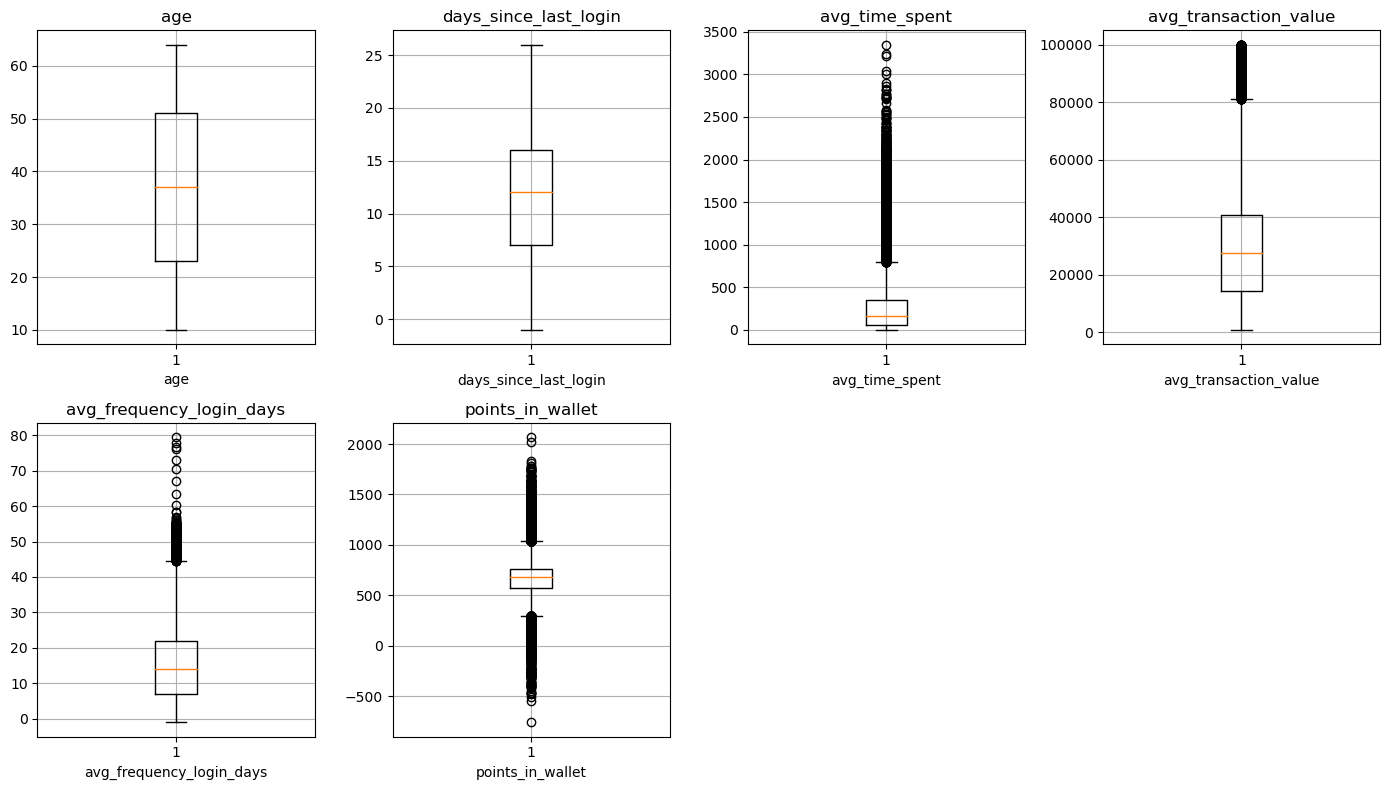

                     Column  Outlier Count
0                       age              0
1     days_since_last_login              0
2            avg_time_spent           4813
3     avg_transaction_value           1734
4  avg_frequency_login_days            436
5          points_in_wallet          10259


In [97]:
numerical_columns = [
    'age',
    'days_since_last_login',
    'avg_time_spent',
    'avg_transaction_value',
    'avg_frequency_login_days',
    'points_in_wallet'
]

# Create the box plots
plt.figure(figsize=(14, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    plt.boxplot(df[column])
    plt.title(column)
    plt.xlabel(column)
    plt.grid(True)

plt.tight_layout()
plt.show()



# Function to count outliers based on IQR
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Count outliers for each numerical column
outlier_counts = {column: count_outliers(df, column) for column in numerical_columns}

# Convert to DataFrame for tabular display
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier Count'])

# Print the DataFrame
print(outlier_counts_df)

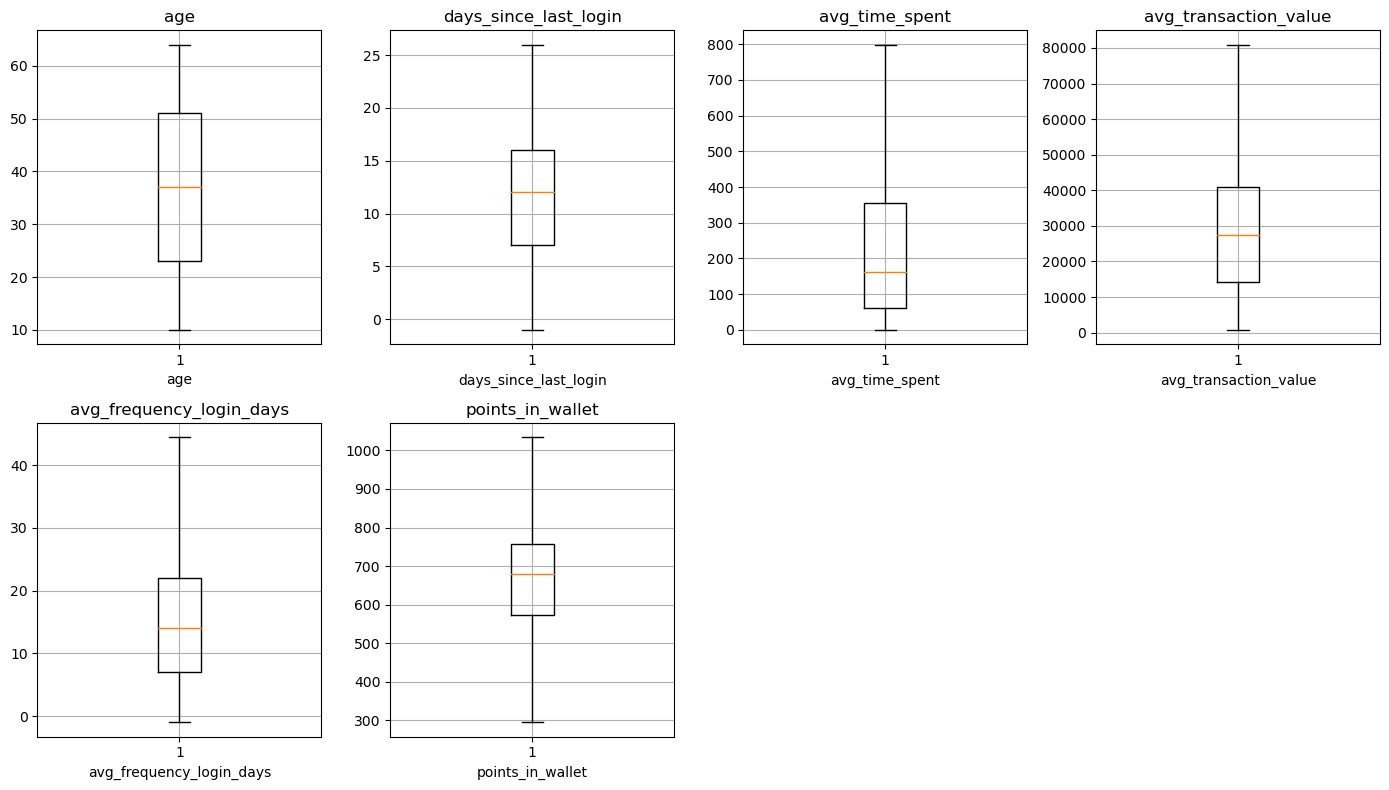

                     Column  Outlier Count
0                       age              0
1     days_since_last_login              0
2            avg_time_spent              0
3     avg_transaction_value              0
4  avg_frequency_login_days              0
5          points_in_wallet              0


In [98]:
# Function to cap outliers based on IQR
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Apply the function to each numerical column
for column in numerical_columns:
    df = cap_outliers(df, column)

# Verify the capping by displaying the updated box plots
plt.figure(figsize=(14, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    plt.boxplot(df[column])
    plt.title(column)
    plt.xlabel(column)
    plt.grid(True)

plt.tight_layout()
plt.show()


# Count outliers for each numerical column
outlier_counts = {column: count_outliers(df, column) for column in numerical_columns}

# Convert to DataFrame for tabular display
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier Count'])

# Print the DataFrame
print(outlier_counts_df)


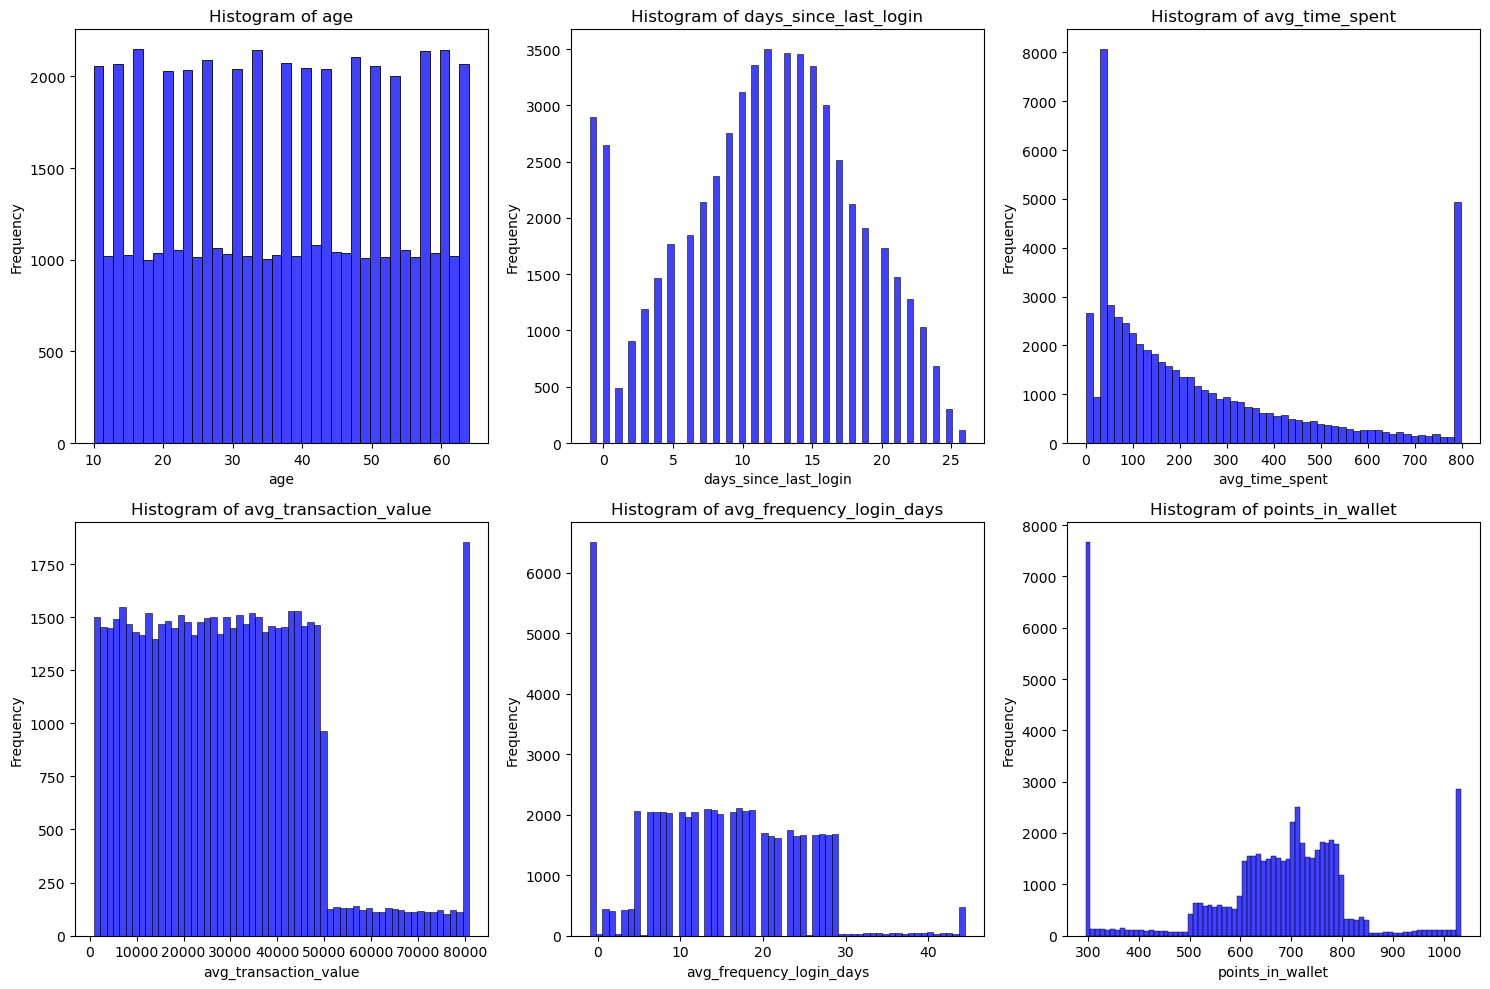

In [101]:

# List of numerical columns
numerical_columns = [
    'age',
    'days_since_last_login',
    'avg_time_spent',
    'avg_transaction_value',
    'avg_frequency_login_days',
    'points_in_wallet'
]

# Create subplots with a grid layout for histograms
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Adjust rows and columns as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], kde=False, ax=axes[i], color='blue')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()